<a href="https://colab.research.google.com/github/SARA3SAEED/LLM-2/blob/main/28_(openai)_Assessment_3_Day_4_5_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assessment

You have to create an end-to-end RAG using the dataset below. Work in the same groups as before



1.   Describe the data (EDA)
2.   Build a search engine (with basic chunking capabilities) - explore recursive vs. other chunking capabilities (discussed in youtube video and pdf rag examples)
3.   Your search embeddings should be derived from FAISS and not the dataframe + use previously learned techniques to build search - your search should not be limited to only embedding of particular column
4.   Build RAG using openai + ollama - use the openai key provided by Hamza
5.   Deploy search capability on huggingface (gradio)
6.   Bonus: implement rag on huggingface (gradio)

Submit link to gradio app on the huggingface by hosting it on: https://huggingface.co/tuwaiq-allam





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno


In [ ]:
url='https://drive.google.com/file/d/1gl7WAkJr6Nyke7YckzXxdL-iM4UjhLGX/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           3327 non-null   object 
 1   title         3327 non-null   object 
 2   author        3327 non-null   object 
 3   description   1325 non-null   object 
 4   publish_date  3327 non-null   float64
 5   full_text     3327 non-null   object 
 6   url           3327 non-null   object 
 7   categories    3327 non-null   object 
dtypes: float64(1), object(7)
memory usage: 208.1+ KB


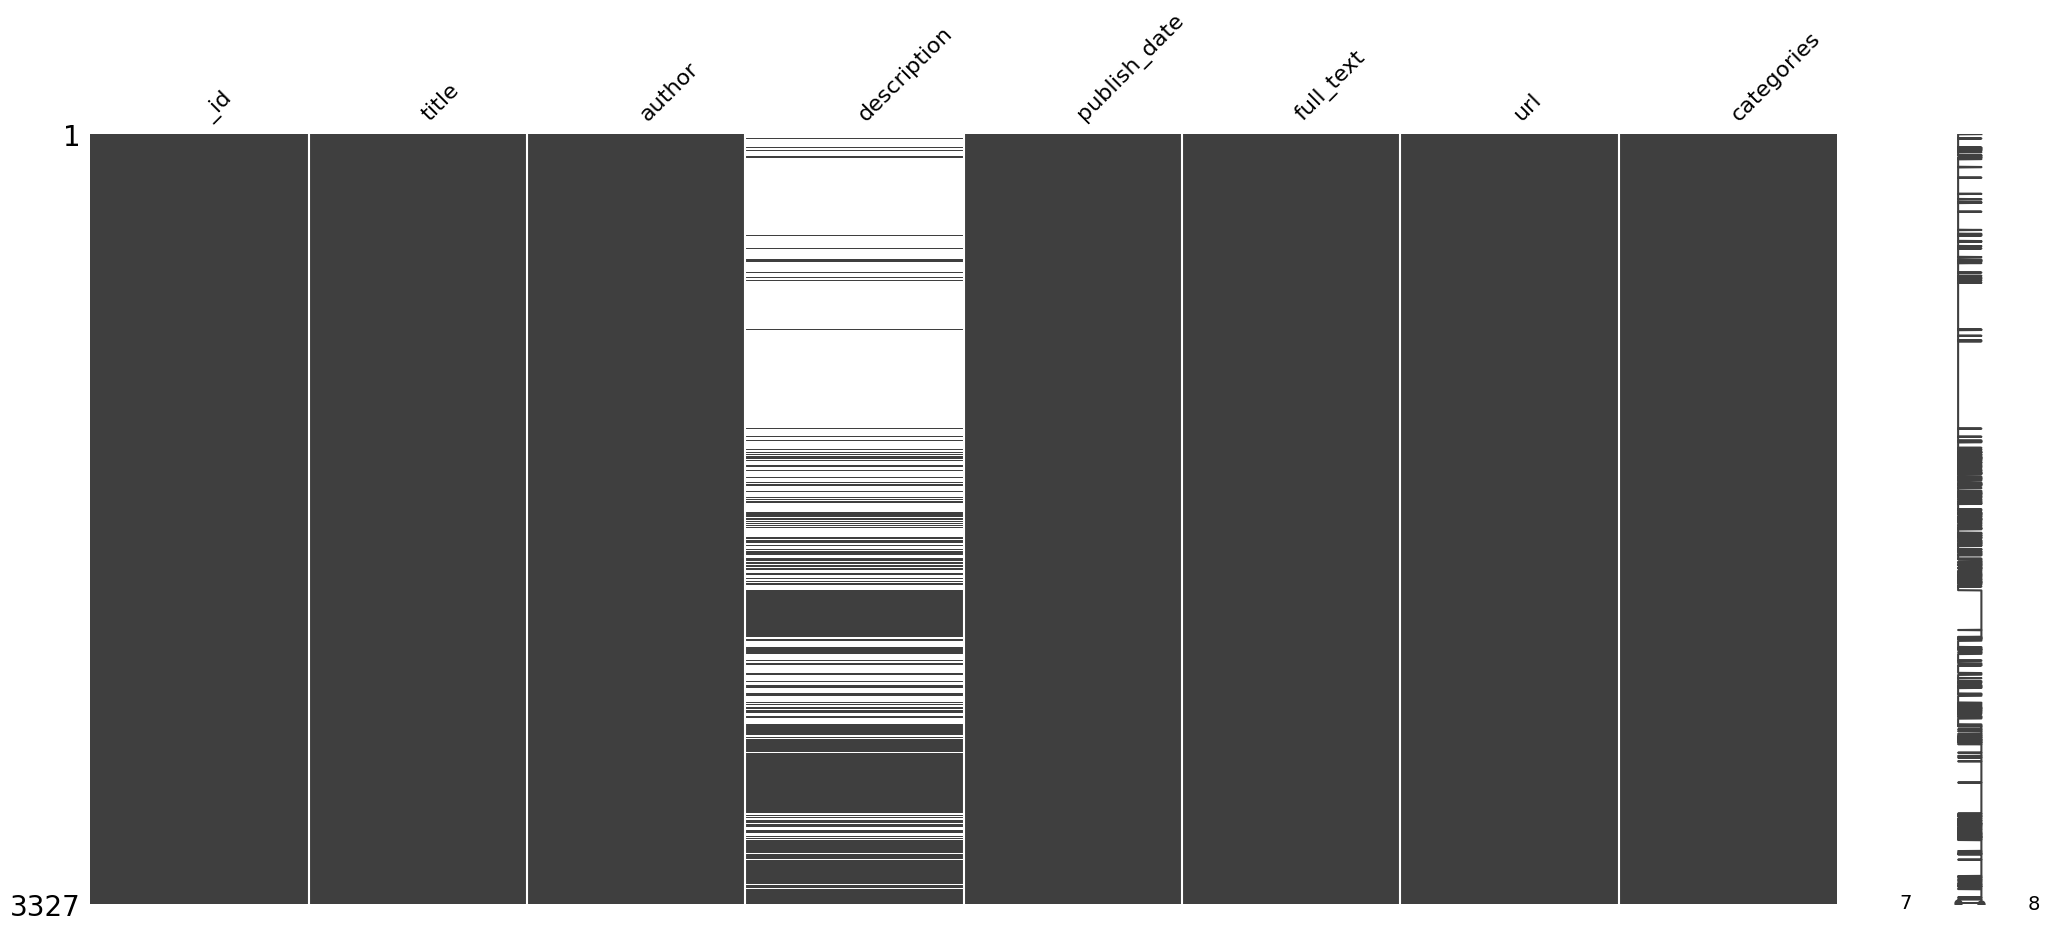

,0
_id,0
title,0
author,0
description,2002
publish_date,0
full_text,0
url,0
categories,0


In [ ]:
df.info()

df.describe(include='all')


msno.matrix(df)
plt.show()


df.isnull().sum()

In [ ]:
df

,_id,title,author,description,publish_date,full_text,url,categories
0,63927168098523fa9d5ef047,Are The Democrats Screwed In The Senate After ...,Nate Silver,\nAre The Democrats Screwed In The Senate Afte...,1.670516e+12,\n\n\n\n2028 Election\nAre The Democrats Screw...,https://fivethirtyeight.com/features/democrats...,['news']
1,652b21ec754471a9795c291a,Beyond the Narrative,Sam Freedman,NaN,1.697272e+12,We are told before every party conference that...,https://samf.substack.com/p/beyond-the-narrative,['news']
2,6529cfaff59ed61396db838c,Ballot Measures: A Preview,Walter Olson,NaN,1.697227e+12,Walter Olson Voters will go to the polls soon...,https://www.cato.org/blog/ballot-measures-preview,['news']
3,6529d030f59ed61396db8398,Trump’s Only Real Worldview Is Pettiness,David A. Graham,NaN,1.697214e+12,Let no one say that Donald Trump has lost his ...,"tag:theatlantic.com,2023:50-675637",['news']
4,6529d072f59ed61396db839e,The COVID Bailout of State and Local Governmen...,Eric Boehm,NaN,1.697212e+12,Two years after Congress authorized a h...,https://reason.com/2023/10/13/the-covid-bailou...,['news']
...,...,...,...,...,...,...,...,...
3322,611d886b3e00864ef8e3e1b0,The Opposite of Toxic Positivity,Scott Barry Kaufman,NaN,1.629284e+12,Countless books have been written on the “powe...,https://www.theatlantic.com/family/archive/202...,['news']
3323,611c537c2654b3ac01ebf2c0,Biden’s most heartless betrayal,Ayaan Hirsi Ali,America cares more about pronouns than the fat...,1.629242e+12,"“I’ve been clear,” President Joe Biden told th...",https://unherd.com/2021/08/bidens-most-heartle...,['news']
3324,611c537c2654b3ac01ebf2c1,Cuttlefish Break the Rules of Aging,Katherine J. Wu,"Unlike humans, these eight-armed creatures can...",1.629241e+12,"Cuttlefish, with their blimp-shaped bodies and...",https://www.theatlantic.com/science/archive/20...,['news']
3325,61159ee621e7fdae5c6a2fe7,How the Pandemic Now Ends,Ed Yong,Cases of COVID-19 are rising fast. Vaccine upt...,1.628766e+12,"In September 2020, just before COVID-19 began ...",https://www.theatlantic.com/health/archive/202...,['news']


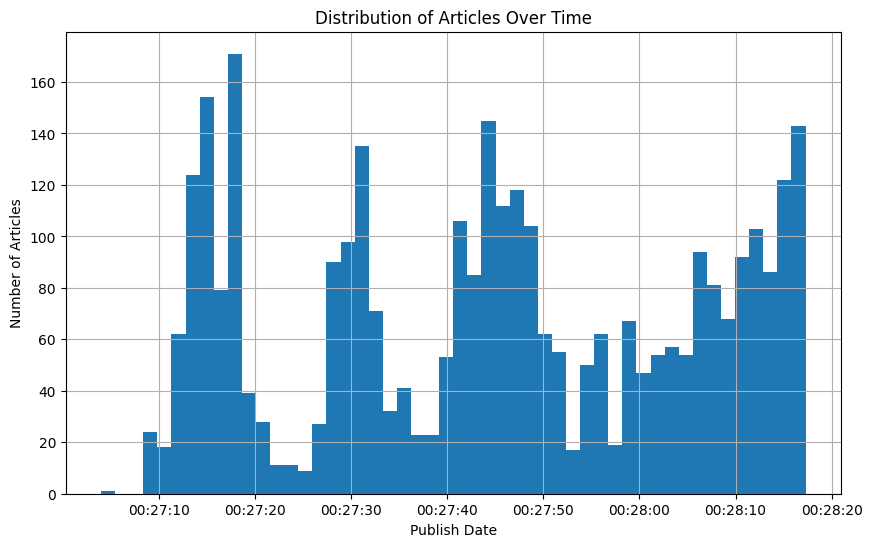

In [ ]:

df['publish_date'] = pd.to_datetime(df['publish_date'])


plt.figure(figsize=(10, 6))
df['publish_date'].hist(bins=50)
plt.title('Distribution of Articles Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.show()


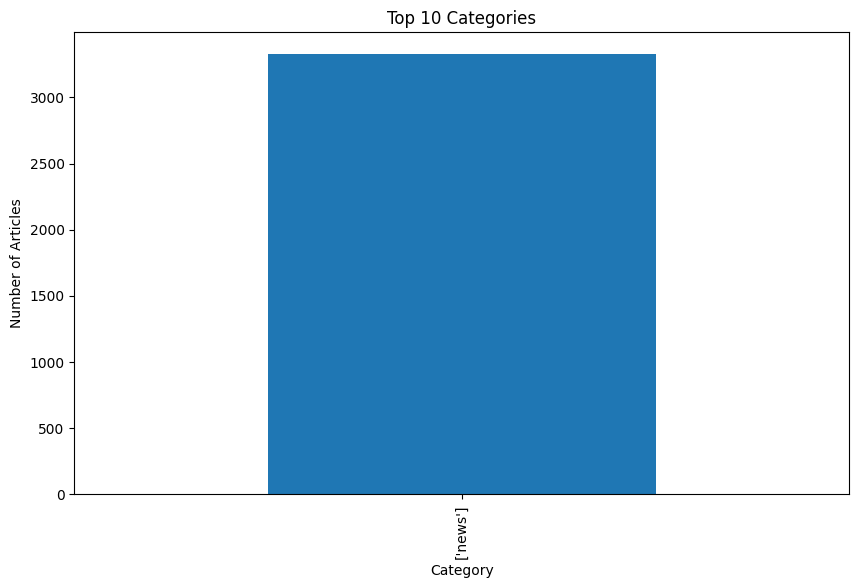

In [ ]:

plt.figure(figsize=(10, 6))
df['categories'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()


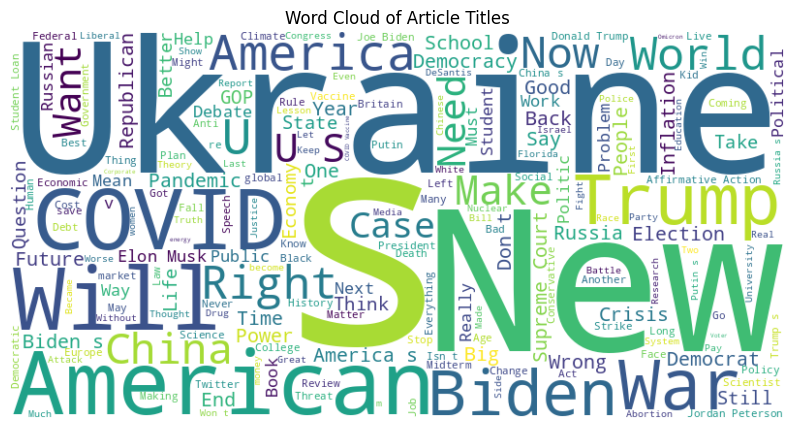

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'].dropna()))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()


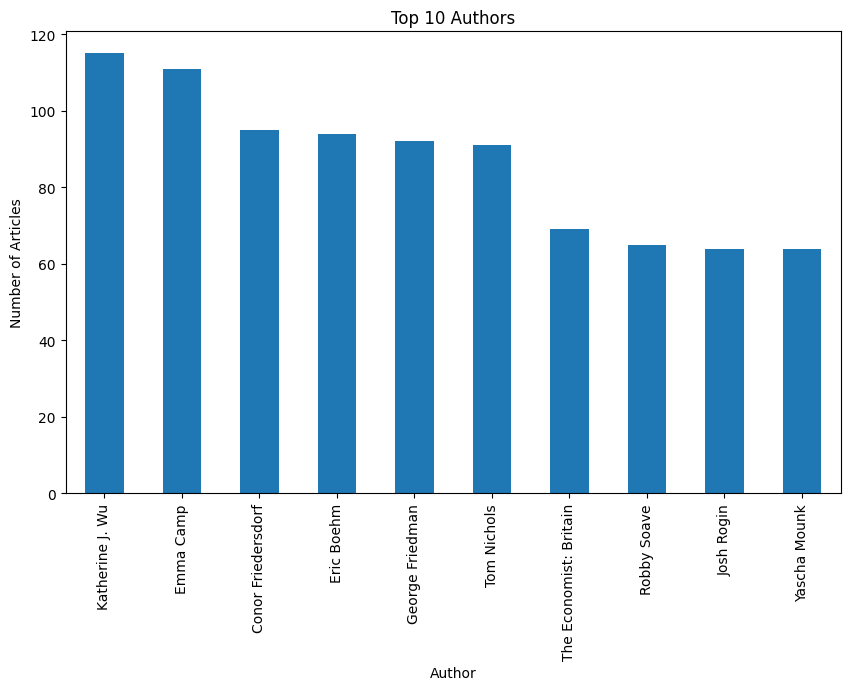

In [ ]:

plt.figure(figsize=(10, 6))
df['author'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
import re
df['full_text'] = df["full_text"].apply(lambda x: x.replace("\n", " "))
df['full_text'] = df['full_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',str(x)))



df['description'] = df['description'].apply(lambda x: x.replace("\n", " ") if isinstance(x, str) else x)
df['description'] = df['description'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',str(x)))




# 2. Build a Search Engine with Chunking Capabilities


In [ ]:
!pip3 install langchain
!pip3 install langchain_pinecone
!pip3 install langchain[docarray]
!pip3 install langchain_community

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document

def create_document_with_metadata(row):

    combined_text = f"Title: {row['title']}  \nDescription: {row['description']} \nFull Text: {row['full_text']}"


    metadata = {
        'id': row['_id'],
        'title': row['title'],
        'author': row['author'],
        'publish_date': row['publish_date'],
        'URL': row['url'],
        'categories': row['categories'],
    }

    return Document(page_content=combined_text, metadata=metadata)


documents = [create_document_with_metadata(row) for _, row in df.iterrows()]


text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)


chunked_documents = text_splitter.split_documents(documents)


for doc in chunked_documents[:5]:
    print(doc.metadata)
    print(doc.page_content[:500])
    print('-' * 80)


{'id': '63927168098523fa9d5ef047', 'title': 'Are The Democrats Screwed In The Senate After 2024?', 'author': 'Nate Silver', 'publish_date': Timestamp('1970-01-01 00:27:50.515535'), 'URL': 'https://fivethirtyeight.com/features/democrats-senate-chances-2024-and-beyond/', 'categories': "['news']"}
Title: Are The Democrats Screwed In The Senate After 2024?
--------------------------------------------------------------------------------
{'id': '63927168098523fa9d5ef047', 'title': 'Are The Democrats Screwed In The Senate After 2024?', 'author': 'Nate Silver', 'publish_date': Timestamp('1970-01-01 00:27:50.515535'), 'URL': 'https://fivethirtyeight.com/features/democrats-senate-chances-2024-and-beyond/', 'categories': "['news']"}
Description:  Are The Democrats Screwed In The Senate After 2024 No but the party faces an uphill battlee   Im not that impressed by longterm projections of Democratic doom in the Senate Mostly thats because Im not that impressed by longterm political projections in g

In [ ]:
!pip install faiss-gpu
!pip install sentence_transformers
import faiss

In [ ]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
sample  = chunked_documents[0:100]
embeddings = np.vstack([embedder.encode(doc.page_content) for doc in sample])


d = embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(embeddings)


In [ ]:
def search_with_metadata_and_reranking(query, index, chunked_documents, model, filters=None, top_k=5):

    query_embedding = model.encode([query])


    distances, indices = index.search(query_embedding, top_k)


    results = [chunked_documents[i] for i in indices[0]]

    if filters:
        filtered_results = []
        for result in results:
            match = True
            for key, value in filters.items():
                if key == "categories":
                    categories = eval(result.metadata.get("categories", "[]"))
                    if value not in categories:
                        match = False
                        break
                else:
                    if result.metadata.get(key) != value:
                        match = False
                        break
            if match:
                filtered_results.append(result)
        results = filtered_results


    results.sort(key=lambda x: x.metadata['publish_date'], reverse=True)


    for result in results[:top_k]:
        print("Title:", result.metadata['title'])
        print("Author:", result.metadata['author'])
        print("Publish Date:", result.metadata['publish_date'])
        print("URL:", result.metadata['URL'])
        print("Chunk Content:", result.page_content[:500])
        print('-' * 80)


    return results


query = "What happend two years after Congres?"
filters = {"categories": "news", "author": "Eric Boehm"}
search_with_metadata_and_reranking(query, index, sample, embedder, filters=None, top_k=5)




Title: Beyond the Narrative
Author: Sam Freedman
Publish Date: 1970-01-01 00:28:17.272260
URL: https://samf.substack.com/p/beyond-the-narrative
Chunk Content: that it felt more like the conference a party has after its lost an election rather than the one before with all the focus on leadership jockeying and indulging in ideological fantasiesSo the lobby arrived at the Labour conference  which I did go to  primed to write positively about the contrast As long as Starmer and team could look vaguely professional and serious then they were going to get good coverage The narrative is in their favour and that makes politics a lot easier Announcements that 
--------------------------------------------------------------------------------
Title: Beyond the Narrative
Author: Sam Freedman
Publish Date: 1970-01-01 00:28:17.272260
URL: https://samf.substack.com/p/beyond-the-narrative
Chunk Content: conferences have failed to meet in the past We shouldnt begrudge weary Labour folk their raptures at

[Document(metadata={'id': '652b21ec754471a9795c291a', 'title': 'Beyond the Narrative', 'author': 'Sam Freedman', 'publish_date': Timestamp('1970-01-01 00:28:17.272260'), 'URL': 'https://samf.substack.com/p/beyond-the-narrative', 'categories': "['news']"}, page_content='that it felt more like the conference a party has after its lost an election rather than the one before with all the focus on leadership jockeying and indulging in ideological fantasiesSo the lobby arrived at the Labour conference  which I did go to  primed to write positively about the contrast As long as Starmer and team could look vaguely professional and serious then they were going to get good coverage The narrative is in their favour and that makes politics a lot easier Announcements that would get ripped to pieces if the lobby were moving in for a kill get left unscrutinised Dull speeches are lauded as triumphs Youve got to enjoy it while it lasts \xa0\xa0I dont want to be churlish about this Seeming professional 

# RAG

In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

!pip install colab-xterm -qqq
!pip install langchain -qqq
!pip install langchain_community -qqq

In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!pip install openai
!pip install ollama

import openai
import ollama

In [ ]:
openai.api_key = "OPENAI_API_KEY"


In [ ]:
!pip install openai==0.27.7

In [ ]:
from google.colab import userdata
import openai
openai.api_key = userdata.get('OPENAI_API_KEY')

In [ ]:
def rag_based_generation(query, index, chunked_documents, model, filters=None, top_k=5):

    results = search_with_metadata_and_reranking(query, index, chunked_documents, model, filters, top_k)
    print("Results before filtering:  " , results)


    if not results:
        print("No relevant chunks found for the query.")
        return "No relevant information found."


    context = " ".join([result.page_content for result in results if result is not None])


    # if not context:
    #     print("No content available in the retrieved chunks.")
    #     return "No relevant content available."


    prompt = f"Based on the following information:\n{context}\n\nAnswer the question: {query}"

    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ]
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        max_tokens=1500,
        n=1,
        stop=None,
        temperature=0.2, #higher temperature means more creative or more hallucination
        messages = messages


    )




    generated_answer = response.choices[0].message['content'].strip()
    print("Generated Answer:", generated_answer)

    return generated_answer

query = "What happend two years after Congres?"
filters = {"categories": "news", "author": "Eric Boehm"}
result_rag=rag_based_generation(query, index, sample, embedder, filters=None, top_k=10)



Title: Beyond the Narrative
Author: Sam Freedman
Publish Date: 1970-01-01 00:28:17.272260
URL: https://samf.substack.com/p/beyond-the-narrative
Chunk Content: that it felt more like the conference a party has after its lost an election rather than the one before with all the focus on leadership jockeying and indulging in ideological fantasiesSo the lobby arrived at the Labour conference  which I did go to  primed to write positively about the contrast As long as Starmer and team could look vaguely professional and serious then they were going to get good coverage The narrative is in their favour and that makes politics a lot easier Announcements that 
--------------------------------------------------------------------------------
Title: Beyond the Narrative
Author: Sam Freedman
Publish Date: 1970-01-01 00:28:17.272260
URL: https://samf.substack.com/p/beyond-the-narrative
Chunk Content: conferences have failed to meet in the past We shouldnt begrudge weary Labour folk their raptures at

In [ ]:
print(result_rag)

Two years after Congress authorized a bailout of state and local governments as part of a COVID-era emergency spending bill, a report from the Government Accountability Office (GAO) found that most of the allocated funds had not been spent. Specifically, states, including Washington D.C., had spent only 45 percent of the funding received through the Coronavirus State and Local Fiscal Recovery Funds program, while local governments reported spending just 38 percent of their funds. This raised questions about whether the bailout was even necessary in the first place.


# ENTIRE DATA

In [ ]:

full_embeddings = np.vstack([embedder.encode(doc.page_content) for doc in chunked_documents])

d = full_embeddings.shape[1]
full_index = faiss.IndexFlatL2(d)
full_index.add(full_embeddings)


KeyboardInterrupt: 

In [ ]:
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.0
    Uninstalling tomlkit-0.13.0:
      Successfully uninstalled tomlkit-0.13.0


In [ ]:
import gradio as gr

def search_interface(query, author=None, category=None):

    filters = {}
    if author:
        filters['author'] = author
    if category:
        filters['categories'] = category


    results = search_with_metadata_and_reranking(query, full_index, chunked_documents, embedder, filters=filters, top_k=5)


    if not results:
        return "No relevant information found."

    result_text = ""
    for result in results:
        result_text += f"**Title:** {result.metadata['title']}\n"
        result_text += f"**Author:** {result.metadata['author']}\n"
        result_text += f"**URL:** {result.metadata['URL']}\n"
        result_text += f"**Chunk Content:** {result.page_content[:500]}...\n\n"
        result_text += "------------------------------------\n\n"

    return result_text




search_demo = gr.Interface(
    fn=search_interface,
    inputs=[
        gr.Textbox(label="Query"),
        gr.Textbox(label="Author (optional)"),
        gr.Textbox(label="Category (optional)")
    ],
    outputs="markdown",
    title="Search Capability with FAISS and Metadata Filtering"
)


search_demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6fc20c0cf0e97f8d45.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def rag_interface(query, author=None, category=None):

    filters = {}
    if author:
        filters['author'] = author
    if category:
        filters['categories'] = category


    generated_answer = rag_based_generation(query, index, chunked_documents, embedder, filters=filters, top_k=5)

    return generated_answer


rag_demo = gr.Interface(
    fn=rag_interface,
    inputs=[
        gr.Textbox(label="Query"),
        gr.Textbox(label="Author (optional)"),
        gr.Textbox(label="Category (optional)")
    ],
    outputs="text",
    title="RAG (Retrieval-Augmented Generation) with FAISS and OpenAI"
)


rag_demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a560dad768e6179e46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def search_interface(query, author=None, category=None):
    try:
        filters = {}
        if author:
            filters['author'] = author
        if category:
            filters['categories'] = category

        results = search_with_metadata_and_reranking(query, index, chunked_documents, embedder, filters=filters, top_k=5)

        if not results:
            return "No relevant information found."

        result_text = ""
        for result in results:
            # Safely access metadata
            title = result.metadata.get('title', 'N/A')
            author = result.metadata.get('author', 'N/A')
            url = result.metadata.get('URL', 'N/A')
            chunk_content = result.page_content[:500] if result.page_content else "No content"

            # Build the result text
            result_text += f"**Title:** {title}\n"
            result_text += f"**Author:** {author}\n"
            result_text += f"**URL:** {url}\n"
            result_text += f"**Chunk Content:** {chunk_content}...\n\n"
            result_text += "------------------------------------\n\n"

        return result_text

    except Exception as e:
        # Return the error message to Gradio for debugging
        return f"An error occurred: {str(e)}"

# Define the Gradio interface
search_demo = gr.Interface(
    fn=search_interface,
    inputs=[
        gr.Textbox(label="Query"),
        gr.Textbox(label="Author (optional)"),
        gr.Textbox(label="Category (optional)")
    ],
    outputs="markdown",
    title="Search Capability with FAISS and Metadata Filtering"
)

# Launch the Gradio interface
search_demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f72fb08f765bd05fa1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
